In [2]:
## What is the effect of increasing state temperatures on wildfire severity and frequency?

In [21]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from datetime import datetime

In [22]:
# Import data
jan_avg_temp = pd.read_csv('Resources/1990-2020_Jan_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
feb_avg_temp = pd.read_csv('Resources/1990-2020_Feb_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
mar_avg_temp = pd.read_csv('Resources/1990-2020_Mar_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
apr_avg_temp = pd.read_csv('Resources/1990-2020_Apr_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
may_avg_temp = pd.read_csv('Resources/1990-2020_May_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
jun_avg_temp = pd.read_csv('Resources/1990-2020_Jun_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
jul_avg_temp = pd.read_csv('Resources/1990-2020_Jul_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
aug_avg_temp = pd.read_csv('Resources/1990-2020_Aug_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
sep_avg_temp = pd.read_csv('Resources/1990-2020_Sep_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
oct_avg_temp = pd.read_csv('Resources/1990-2020_Oct_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
nov_avg_temp = pd.read_csv('Resources/1990-2020_Nov_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')
dec_avg_temp = pd.read_csv('Resources/1990-2020_Dec_AvgTemp.csv', skiprows= [1, 2, 3, 4], encoding='utf-8')


In [23]:
# Remove anomaly column
for col in jan_avg_temp.columns: 
    print(col) 

California
 Average Temperature
 January


In [24]:
# jan_avg_temp.columns = ['Date', 'Average Temperature', 'NA']
# jan_avg_temp.drop('NA', 1).head()

In [25]:
# List of dataframes
months_dfs = [jan_avg_temp, feb_avg_temp, mar_avg_temp, apr_avg_temp, may_avg_temp, jun_avg_temp, jul_avg_temp, aug_avg_temp, sep_avg_temp, oct_avg_temp, nov_avg_temp, dec_avg_temp]

# Create a for loop to change last column to "NA" for all dfs and then drop column "NA" 
for df in months_dfs:
    df.columns = ['Date', 'Average Temperature', 'NA']
    del df['NA']

In [26]:
# # Split up date into year and month columns
# jan_avg_temp['fake_year'] = pd.to_datetime(jan_avg_temp['Date'],format='%Y%m')
# jan_avg_temp['year'] = pd.DatetimeIndex(jan_avg_temp['fake_year']).year
# jan_avg_temp['month'] = pd.DatetimeIndex(jan_avg_temp['fake_year']).month
# jan_avg_temp.drop('fake_year', 1).head()

In [27]:
# Create a loop to get year and month from all dataframes 
months_dfs = [jan_avg_temp, feb_avg_temp, mar_avg_temp, apr_avg_temp, may_avg_temp, jun_avg_temp, jul_avg_temp, aug_avg_temp, sep_avg_temp, oct_avg_temp, nov_avg_temp, dec_avg_temp]

for df in months_dfs:
    df['fake_year'] = pd.to_datetime(df['Date'],format='%Y%m')
    df['Year'] = pd.DatetimeIndex(df['fake_year']).year
    df['Month'] = pd.DatetimeIndex(df['fake_year']).month
    df.drop('fake_year', 1, inplace= True)
    df.drop('Date', 1, inplace= True)

In [28]:
mar_avg_temp.head()

,Average Temperature,Year,Month
0,51.4,1990,3
1,44.8,1991,3
2,50.8,1992,3
3,52.9,1993,3
4,52.9,1994,3


In [39]:
# Merge data from Jan-Dec on Month (or year), how = left
# merged_jan_feb = jan_avg_temp.merge(feb_avg_temp, on= 'Year', how= 'inner')
# merged_jan_feb

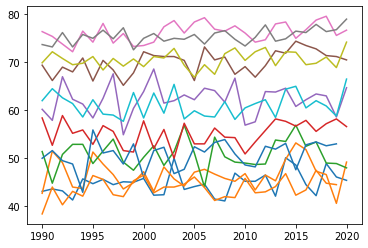

In [49]:
# Plot a line graph showing average monthly temperature over 30 year period
for df in months_dfs:
    x = df['Year']
    y = df['Average Temperature']
    plt.plot(x,y)

In [ ]:
# Plot a line graph showing average annual temperture over 30 year period

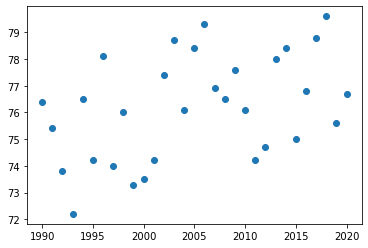

In [53]:
# Plot scatter of each of the above
a = jul_avg_temp['Year']
b = jul_avg_temp['Average Temperature']
plt.scatter(a,b)